SVM = Support Vertor Machine = Метод опорных векторов

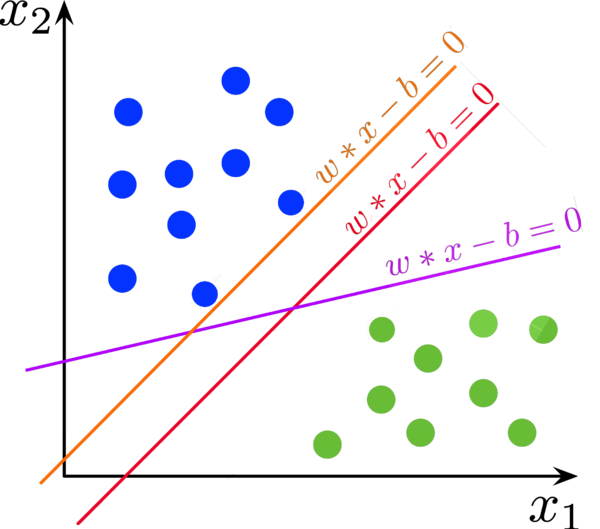

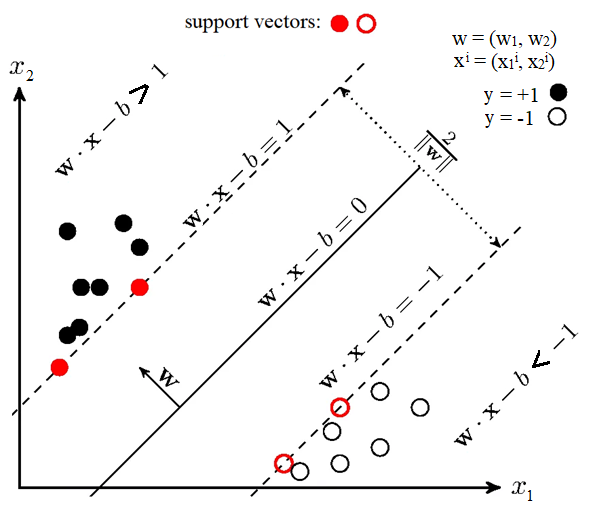

Разделяющая гиперплоскость: $w^Tx - b = 0$
    
При этом для класса "+1" $w_x - b > 0$, для класса "-1" $w^Tx - b < 0$


Ширина разделяющей полосы - проекция вектора $x_+  − x_-$ на нормаль к гиперплоскости $w$:

\begin{align} w^T(x_+  − x_-)/|w| = (w^Tx_+  − w^Tx_-)/|w| = \left((b + 1) - (b - 1)\right)/|w| = 2/|w| \rightarrow \max \end{align}

\begin{align} |w| \rightarrow \min \end{align}

\begin{align} w^Tw/2 \rightarrow \min \end{align}

Отступ $M = y(w^Tx - b)$, классификатор ошибается тогда и только тогда, когда $M<0$, объект находится на разделяющей полосе тогда и только тогда, когда $0 \le M<1$, классификатор верно классифицирует тогда и только тогда, когда $M \ge 1$

Метод опорных векторов с жестким зазором (запрещено попадание на разделяющую полосу):

\begin{aligned}  w^Tw/2 \rightarrow \min \\
y(w^Tx - b) \ge 1 \end{aligned}


Штраф за $M<0$:
\begin{aligned} Penalty = \sum_i{\max(0, 1 - M_i)} \end{aligned}

Функция потерь:
\begin{aligned} Q = \sum_i{\max(0, 1 - M_i)} + \lambda w^Tw/2 \end{aligned}

Пересчет весов:
\begin{aligned} \nabla Q &= \lambda w - yx,\space при \space yw^Tx  < 1 \\
\nabla Q &=  \lambda w,\space при \space yw^Tx \ge 1\end{aligned}


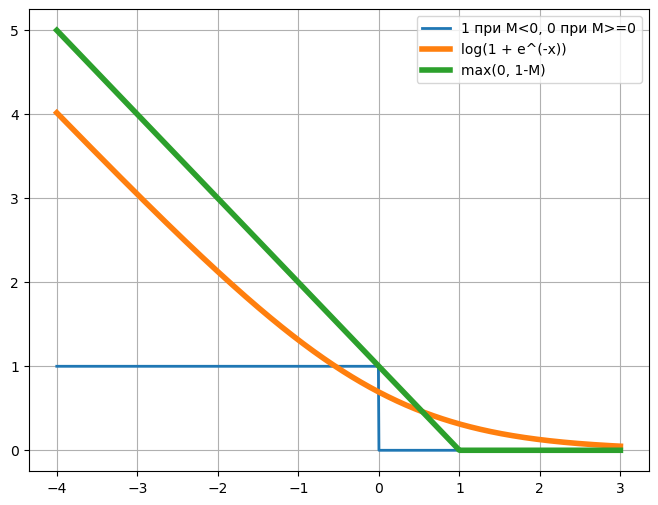

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
plt.rcParams['figure.figsize'] = (8, 6)
xx = np.linspace (-4, 3, 1000)
plt.plot(xx, [(x<0).astype(int) for x in xx], linewidth = 2, label = '1 при M<0, 0 при M>=0')
plt.plot(xx, [np.log(1 + np.exp(-x)) for x in xx], linewidth = 4, label = 'log(1 + e^(-x))')
plt.plot(xx, [np.max(np.array([0, 1-x])) for x in xx], linewidth = 4, label = 'max(0, 1-M)')
plt.grid()
plt.legend()

In [2]:
def add_intercept(a):
    a_ext = np.zeros((a.shape[0], a.shape[1]+1))
    a_ext[:, 0] = int(1)
    a_ext[:, 1:] = a
    return a_ext

class SVMClassification(object):
    def __init__(self, learning_rate = 0.01, lam = 0.1, max_iter = 200):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.lam = lam
        self.w = None
        self.history_w = []
        self.errors = None
        self.loss = None
    def predict(self, X:np.array) -> np.array:
        x_ext = add_intercept(X)
        return np.sign(self.w @ x_ext)
        
    def hinge_loss(self, x, y):
        return max(0, 1 - y*(x@self.w))
                       
    def soft_margin_loss(self, x, y):
        return self.hinge_loss(x, y) + self.lam*(self.w @ self.w)
        
    def fit(self, X, Y, verbose = False):
        X = add_intercept(X)
        self.w = np.random.normal(loc=0, scale=0.05, size=X.shape[1])
        self.history_w.append(self.w)
        errors = []
        loss_epoch = []
        
        for epoch in range(self.max_iter): 
            err = 0
            loss = 0
            for i, x in enumerate(X):
                margin = Y[i]*(self.w @ X[i])
                if margin >= 1: # классифицируем верно
                    self.w -= self.learning_rate*self.lam*self.w/self.max_iter
                    loss += self.soft_margin_loss(X[i],Y[i])
                else: # классифицируем неверно или попадаем на полосу разделения при 0<m<1
                    self.w += self.learning_rate*(Y[i]*X[i] - self.lam*self.w/self.max_iter)
                    err += 1
                    loss += self.soft_margin_loss(X[i],Y[i])
                self.history_w.append(self.w)
            if verbose:
                print('epoch {}. Errors={}. Mean Hinge_loss={}'.format(epoch,err,loss))
            errors.append(err)
            loss_epoch.append(loss)            
        self.history_w = np.array(self.history_w)    
        self.errors = np.array(errors)
        self.loss = np.array(loss_epoch)

epoch 0. Errors=11. Mean Hinge_loss=[10.00219938]
epoch 1. Errors=10. Mean Hinge_loss=[10.00219936]
epoch 2. Errors=10. Mean Hinge_loss=[10.00219934]
epoch 3. Errors=10. Mean Hinge_loss=[10.00219933]
epoch 4. Errors=10. Mean Hinge_loss=[10.00219931]
epoch 5. Errors=10. Mean Hinge_loss=[10.00219929]
epoch 6. Errors=10. Mean Hinge_loss=[10.00219927]
epoch 7. Errors=10. Mean Hinge_loss=[10.00219925]
epoch 8. Errors=10. Mean Hinge_loss=[10.00219924]
epoch 9. Errors=10. Mean Hinge_loss=[10.00219922]
epoch 10. Errors=10. Mean Hinge_loss=[10.0021992]
epoch 11. Errors=10. Mean Hinge_loss=[10.00219918]
epoch 12. Errors=10. Mean Hinge_loss=[10.00219917]
epoch 13. Errors=10. Mean Hinge_loss=[10.00219915]
epoch 14. Errors=10. Mean Hinge_loss=[10.00219913]
epoch 15. Errors=10. Mean Hinge_loss=[10.00219911]
epoch 16. Errors=10. Mean Hinge_loss=[10.0021991]
epoch 17. Errors=10. Mean Hinge_loss=[10.00219908]
epoch 18. Errors=10. Mean Hinge_loss=[10.00219906]
epoch 19. Errors=10. Mean Hinge_loss=[10.00

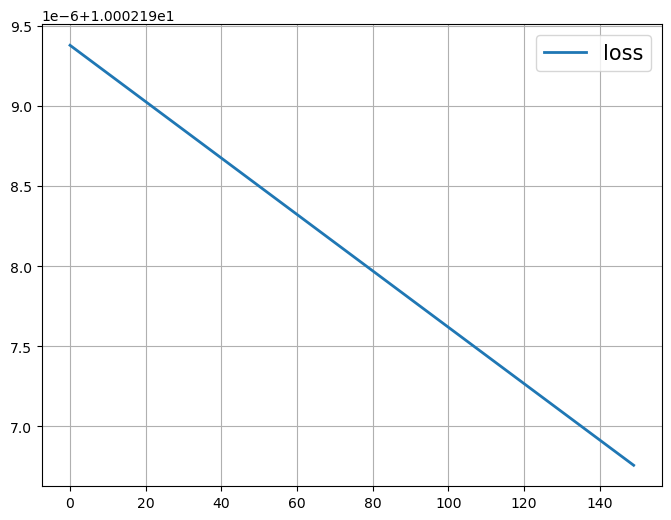

In [3]:
X = np.array([39, 36, 60, 21, 27, 12, 51, 57, 54, 42, 18, 9, 48, 66, 6, 30, 24, 33, 15, 21]).reshape(20,1)
Y = np.array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0]).reshape(20,1)
svm = SVMClassification(learning_rate=0.005, lam=0.006, max_iter=150)
svm.fit(X, Y, verbose = True)

print(svm.errors)
print(svm.w) 

plt.plot(svm.loss, linewidth=2, label='loss')
plt.grid()
plt.legend(prop={'size': 15})
plt.show()

In [6]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
iris = load_iris()
X = iris.data
Y = iris.target
pca = PCA(n_components = 2)
X = pca.fit_transform(X)
Y[Y == 0] = -1
Y[Y > 0] = 1


epoch 0. Errors=88. Mean Hinge_loss=49.88729951113359
epoch 1. Errors=46. Mean Hinge_loss=19.687425738454248
epoch 2. Errors=31. Mean Hinge_loss=11.027428209048507
epoch 3. Errors=22. Mean Hinge_loss=7.080264708030638
epoch 4. Errors=15. Mean Hinge_loss=4.761058709518251
epoch 5. Errors=13. Mean Hinge_loss=3.7733878070796263
epoch 6. Errors=11. Mean Hinge_loss=3.288090803948563
epoch 7. Errors=10. Mean Hinge_loss=3.15515526583745
epoch 8. Errors=10. Mean Hinge_loss=2.9856690084438746
epoch 9. Errors=10. Mean Hinge_loss=2.8548512561167896
epoch 10. Errors=7. Mean Hinge_loss=2.7972044914648824
epoch 11. Errors=7. Mean Hinge_loss=2.765636845192729
epoch 12. Errors=6. Mean Hinge_loss=2.6730318073935218
epoch 13. Errors=7. Mean Hinge_loss=2.636929284647303
epoch 14. Errors=7. Mean Hinge_loss=2.6080053623024644
epoch 15. Errors=6. Mean Hinge_loss=2.5348610408116685
epoch 16. Errors=7. Mean Hinge_loss=2.4989388158224215
epoch 17. Errors=7. Mean Hinge_loss=2.4653617618981576
epoch 18. Errors=6

[88 46 31 22 15 13 11 10 10 10  7  7  6  7  7  6  7  7  6  7  4  4  4  4
  3  2  3  3  2  3  3  2  1  2  1  2  1  2  1  1  2  1  2  1  2  1  1  2
  1  2  1  2  1  1  2  1  2  1  2  1  2  1  1  2  1  2  1  2  1  1  2  1
  2  1  2  1  1  2  1  2  1  2  1  1  2  1  2  1  2  1  1  2  1  2  1  2
  1  1  2  1  2  1  2  1  1  2  1  2  1  2  1  1  2  1  2  1  2  1  1  2
  1  2  1  2  1  1  2  1  2  1  2  1  1  2  1  2  1  2  1  1  2  0  0  0
  0  0  0  0  0  0]
[ 1.38050366  1.11295831 -0.83114941]


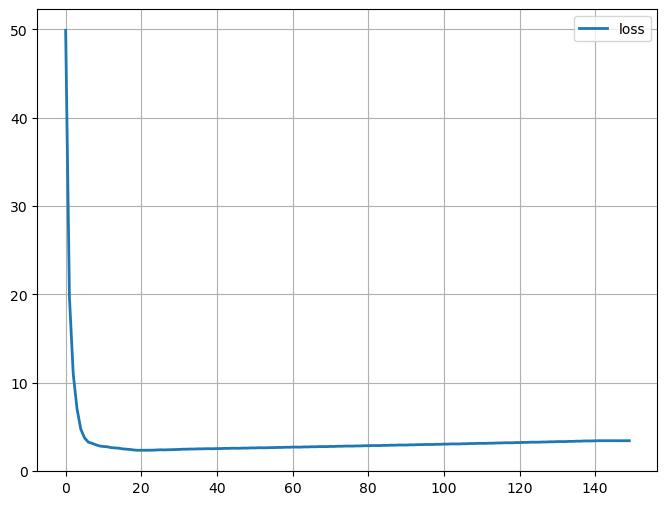

In [7]:
np.random.seed(123)
svm = SVMClassification(learning_rate = 0.005, lam = 0.006, max_iter = 150)
svm.fit(X, Y, verbose = True)
print(svm.errors)
print(svm.w)
plt.plot(svm.loss, linewidth = 2, label = 'loss')
plt.grid()
plt.legend()
plt.show()

Реализовать классификацию методом svm для набора данных  German Credit Cards UCI.csv